In [8]:
import tensorflow as tf

# load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Normalize 
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)
# set seed and build the model
tf.random.set_seed =  42
from tensorflow.keras import Sequential
model = Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=5,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/5
1875/1875 [==============================] - 153s 80ms/step - loss: 0.6000 - accuracy: 0.8011 - val_loss: 0.4984 - val_accuracy: 0.9635
Epoch 2/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.2542 - accuracy: 0.9197 - val_loss: 0.3533 - val_accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.2077 - accuracy: 0.9356 - val_loss: 0.3205 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.1786 - accuracy: 0.9443 - val_loss: 0.2354 - val_accuracy: 0.9785
Epoch 5/5
1875/1875 [==============================] - 157s 84ms/step - loss: 0.1655 - accuracy: 0.9478 - val_loss: 0.2294 - val_accuracy: 0.9843


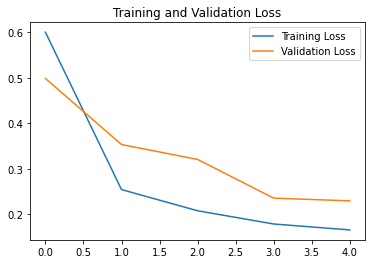

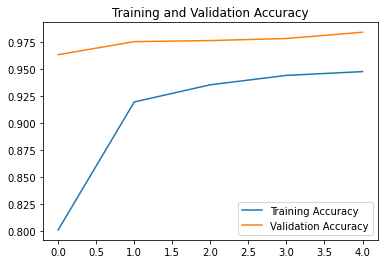

In [9]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy values
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.22943344712257385
Test accuracy: 0.9843000173568726
